In [1]:
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.distance import DistanceMatcher
import pickle
import json
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import tqdm, os
from collections import Counter, defaultdict
import osmnx as ox

In [2]:
data_file = map_file = "../dataset/"

f = open(data_file + "longhua_1.8k.pkl", "rb")
G = pickle.load(f)
len(G.nodes())

1839

In [3]:
cam_path = '../dataset/sim_traj/tracklet.json'
cam_file = '../dataset/cameras.json'

In [5]:
## camid loc

import re

tklet = json.load(open(cam_path, 'rb'))
camid2nodeid = {}
cam_loc = []
for _, vlu in tklet.items():
    cid = int(vlu['camera_id'][11:])
    if cid in camid2nodeid.keys():
        continue
    pos = vlu['camera_loc']
    lon_match = re.search(r"lon:(\d+\.\d+)", pos)
    lat_match = re.search(r"lat:(\d+\.\d+)", pos)
    pos = float(lon_match.group(1)), float(lat_match.group(1))
    cam_loc.append({'camera_id': cid, 'position': [*pos]})
    ans = [pos[0], pos[1]]
    nearest_node = ox.nearest_nodes(G, *ans)
    camid2nodeid[cid] = nearest_node
    if cid == 81:
        print(nearest_node)

221


In [12]:
import json

json.dump(cam_loc, open(cam_file, 'w'), indent=4)

In [ ]:


import matplotlib.pyplot as plt

graph = G
fig, ax = ox.plot_graph(graph,
                        node_size=0,
                        bgcolor='w',
                        edge_color='#dcdcdc',
                        show=False,
                        close=False)
highlight_nodes = camid2nodeid.values()
with open(data_file + '/camid2nodeid.pkl', 'wb') as f:
    pickle.dump(camid2nodeid, f)
# 遍历每个节点，如果节点在需要高亮的节点列表中，就将该节点标记为红色
for node in graph.nodes():
    if node in highlight_nodes:
        size, color = (20, 'r')
        x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
        ax.scatter(x, y, c=color, s=size)

221


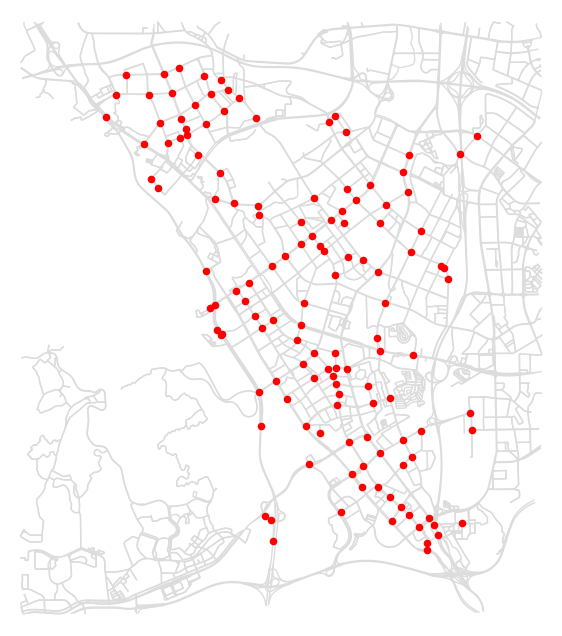

In [4]:
import re

tklet = json.load(open(cam_path, 'rb'))
camid2nodeid = {}
for _, vlu in tklet.items():
    cid = int(vlu['camera_id'][11:])
    if cid in camid2nodeid.keys():
        continue
    pos = vlu['camera_loc']
    lon_match = re.search(r"lon:(\d+\.\d+)", pos)
    lat_match = re.search(r"lat:(\d+\.\d+)", pos)
    pos = float(lon_match.group(1)), float(lat_match.group(1))

    ans = [pos[0], pos[1]]
    nearest_node = ox.nearest_nodes(G, *ans)
    camid2nodeid[cid] = nearest_node
    if cid == 81:
        print(nearest_node)

import matplotlib.pyplot as plt

graph = G
fig, ax = ox.plot_graph(graph,
                        node_size=0,
                        bgcolor='w',
                        edge_color='#dcdcdc',
                        show=False,
                        close=False)
highlight_nodes = camid2nodeid.values()
with open(data_file + '/camid2nodeid.pkl', 'wb') as f:
    pickle.dump(camid2nodeid, f)
# 遍历每个节点，如果节点在需要高亮的节点列表中，就将该节点标记为红色
for node in graph.nodes():
    if node in highlight_nodes:
        size, color = (20, 'r')
        x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
        ax.scatter(x, y, c=color, s=size)